In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, power_transform, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import sklearn
from sklearn.impute import SimpleImputer
import phik
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline as impipe
from phik.binning import bin_data
import itertools
import mlflow
import optuna
from sklearn.metrics import (
    accuracy_score,
    make_scorer,
    PrecisionRecallDisplay,
    precision_recall_curve,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    balanced_accuracy_score,
    ConfusionMatrixDisplay,
    confusion_matrix,
    roc_curve
)

e:\projects\stroke\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mlflow.set_tracking_uri("http://84.201.180.128:8000/")
pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
pd.set_option('display.max_columns', None)

In [3]:
data=pd.read_csv(r"E:\projects\stroke\data\brain_stroke.csv")

data

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     residence_type  glucose_level   bmi   smoking_status  stroke  
0             Urban         228.69  36.6  formerly smoked       1  
1             Rural         105.92  32.5     never smoked       1  
2             Urban         171.23  34.4           smokes       1  
3             Rural         174.12  24.0     never smoked       1  
4             Urban         186.21  29.0  formerly smoked       1  
...             ...            ...   ...              ...     ...  
4976          Rural          70.15  29.8  formerly smoked       0  
4977          Urban         191.15  31.1           smokes       0  
4978          Rural          95.02  31.8           smokes       0  
4979          Rural          83.94  30.0           smokes       0  
4980          Urban          83.75  29.1     never smoked       0  

[4981 rows x 11 columns]

In [4]:
data.isnull().sum()

gender            0
age               0
hypertension      0
heart_disease     0
ever_married      0
work_type         0
residence_type    0
glucose_level     0
bmi               0
smoking_status    0
stroke            0
dtype: int64

In [5]:
cols = data.columns.to_list()
nuniques = [data[col].nunique() for col in cols]
dtypes = data.dtypes

pd.DataFrame({'dtype': dtypes, 'n uniques': nuniques})

dtype  n uniques
gender           object          2
age             float64        104
hypertension      int64          2
heart_disease     int64          2
ever_married     object          2
work_type        object          4
residence_type   object          2
glucose_level   float64       3895
bmi             float64        342
smoking_status   object          4
stroke            int64          2

In [6]:
eda_data = data.copy()

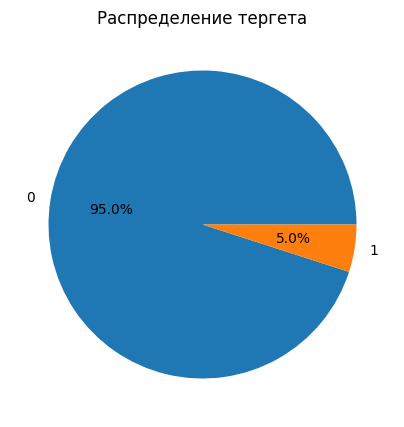

In [7]:
fig, axes = plt.subplots(figsize=(5, 5))
ax = plt.pie(eda_data['stroke'].value_counts(), labels=eda_data['stroke'].value_counts().index, autopct="%.1f%%",)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ—Ä–≥–µ—Ç–∞')
plt.show()

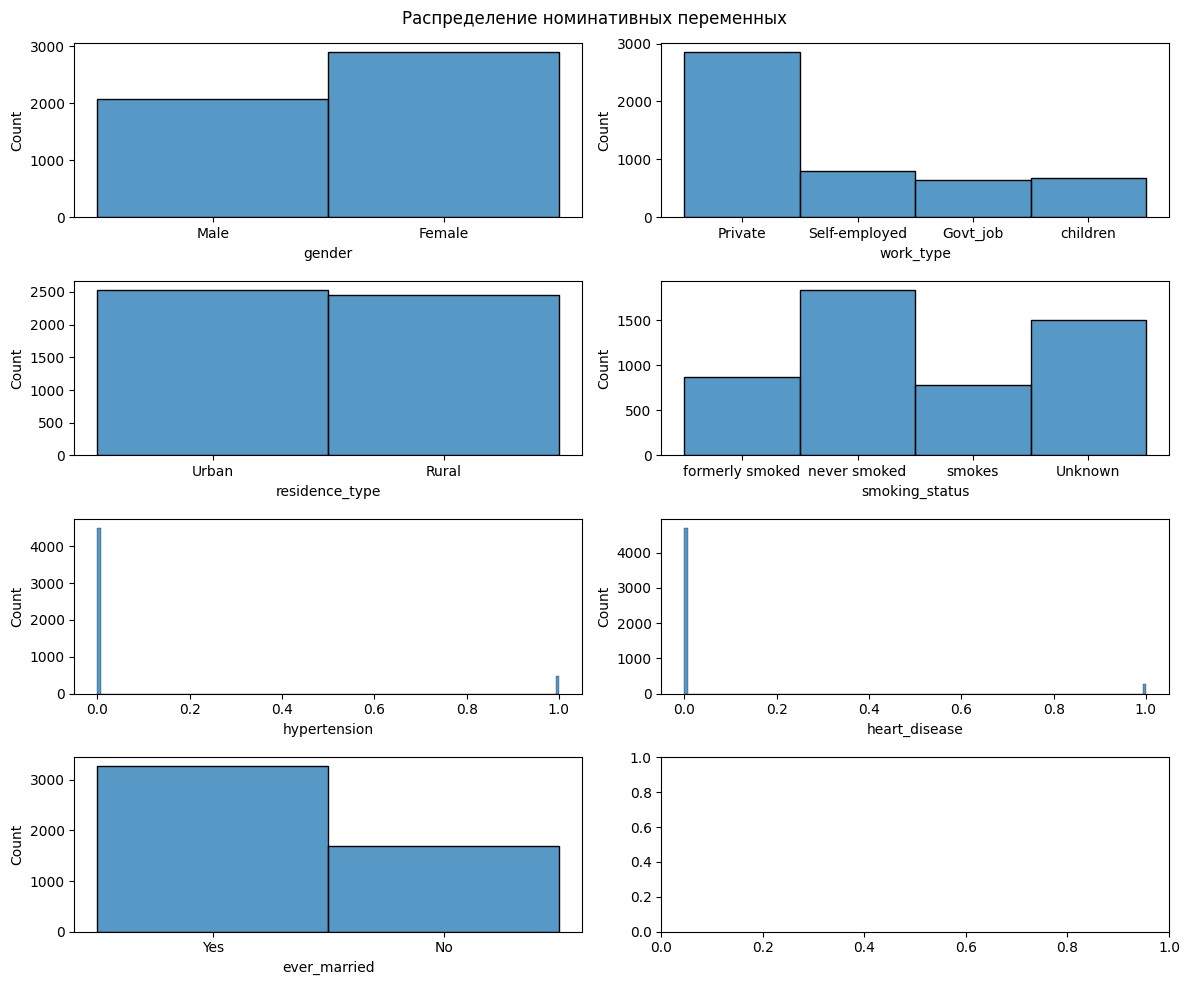

In [8]:
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
plt.suptitle('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–æ–º–∏–Ω–∞—Ç–∏–≤–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö')

ax = sns.histplot(data=eda_data, x='gender', ax=axes[0][0])
ax = sns.histplot(data=eda_data, x='work_type', ax=axes[0][1])
ax = sns.histplot(data=eda_data, x='residence_type', ax=axes[1][0])
ax = sns.histplot(data=eda_data, x='smoking_status', ax=axes[1][1])
ax = sns.histplot(data=eda_data, x='hypertension', ax=axes[2][0])
ax = sns.histplot(data=eda_data, x='heart_disease', ax=axes[2][1])
ax = sns.histplot(data=eda_data, x='ever_married', ax=axes[3][0])

plt.tight_layout()
plt.show()

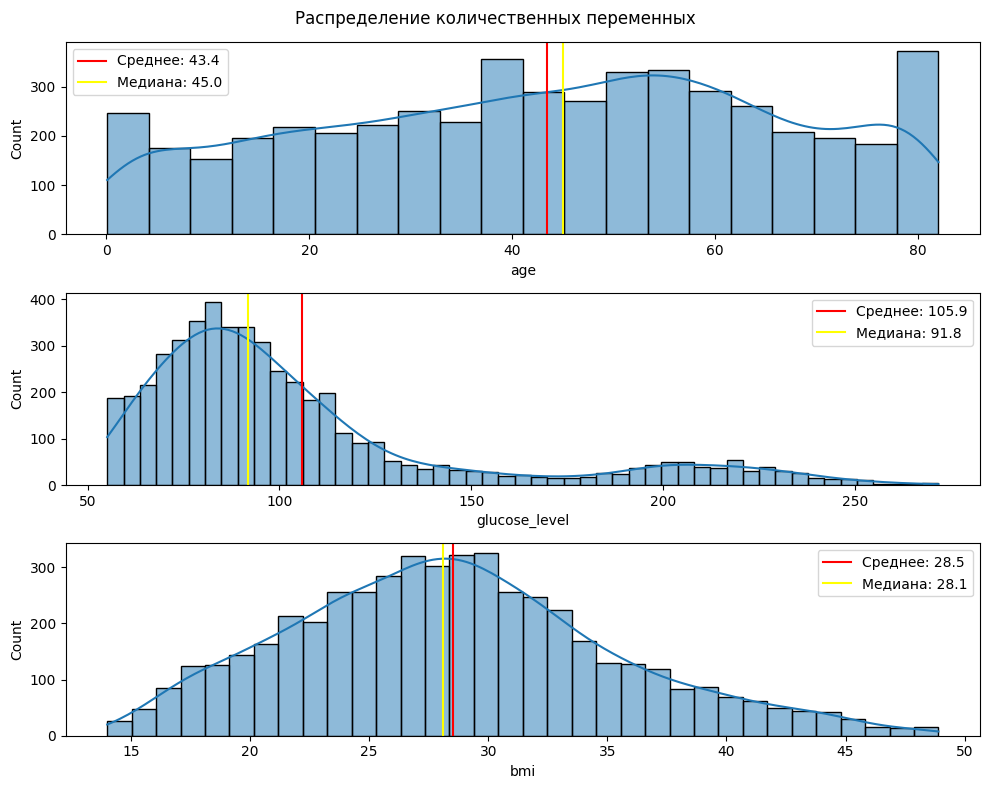

In [9]:
fig, axes = plt.subplots(3, figsize=(10, 8))
plt.suptitle('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö')

ax1 = sns.histplot(data=eda_data, x='age', kde=True, ax=axes[0])
ax1.axvline(x=eda_data["age"].mean(), color="red", label=f"–°—Ä–µ–¥–Ω–µ–µ: {np.round(eda_data['age'].mean(), 1)}")
ax1.axvline(x=eda_data["age"].median(), color="yellow", label=f"–ú–µ–¥–∏–∞–Ω–∞: {np.round(eda_data['age'].median(), 1)}")
ax1.legend()

ax2 = sns.histplot(data=eda_data, x='glucose_level', kde=True, ax=axes[1])
ax2.axvline(x=eda_data["glucose_level"].mean(), color="red", label=f"–°—Ä–µ–¥–Ω–µ–µ: {np.round(eda_data['glucose_level'].mean(), 1)}")
ax2.axvline(x=eda_data["glucose_level"].median(), color="yellow", label=f"–ú–µ–¥–∏–∞–Ω–∞: {np.round(eda_data['glucose_level'].median(), 1)}")
ax2.legend()

ax3 = sns.histplot(data=eda_data, x='bmi', kde=True, ax=axes[2])
ax3.axvline(x=eda_data["bmi"].mean(), color="red", label=f"–°—Ä–µ–¥–Ω–µ–µ: {np.round(eda_data['bmi'].mean(), 1)}")
ax3.axvline(x=eda_data["bmi"].median(), color="yellow", label=f"–ú–µ–¥–∏–∞–Ω–∞: {np.round(eda_data['bmi'].median(), 1)}")
ax3.legend()

plt.tight_layout()
plt.show()

In [10]:
num_data = eda_data[['age', 'glucose_level', 'bmi']].copy()

In [11]:
for col in num_data.columns:
    num_data[col] = PowerTransformer(method='yeo-johnson').fit_transform(num_data[[col]])

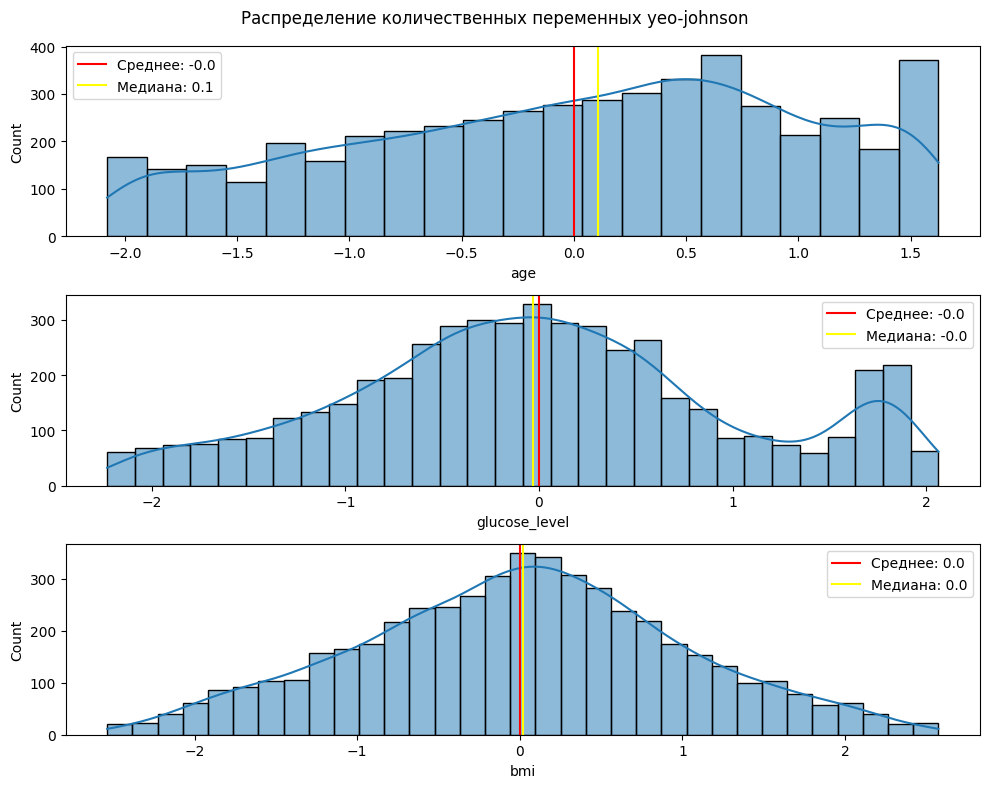

In [12]:
fig, axes = plt.subplots(3, figsize=(10, 8))
plt.suptitle('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö yeo-johnson')

ax1 = sns.histplot(data=num_data, x='age', kde=True, ax=axes[0])
ax1.axvline(x=num_data['age'].mean(), color="red", label=f"–°—Ä–µ–¥–Ω–µ–µ: {np.round(num_data['age'].mean(), 1)}")
ax1.axvline(x=num_data["age"].median(), color="yellow", label=f"–ú–µ–¥–∏–∞–Ω–∞: {np.round(num_data['age'].median(), 1)}")
ax1.legend()

ax2 = sns.histplot(data=num_data, x='glucose_level', kde=True, ax=axes[1])
ax2.axvline(x=num_data["glucose_level"].mean(), color="red", label=f"–°—Ä–µ–¥–Ω–µ–µ: {np.round(num_data['glucose_level'].mean(), 1)}")
ax2.axvline(x=num_data["glucose_level"].median(), color="yellow", label=f"–ú–µ–¥–∏–∞–Ω–∞: {np.round(num_data['glucose_level'].median(), 1)}")
ax2.legend()

ax3 = sns.histplot(data=num_data, x='bmi', kde=True, ax=axes[2])
ax3.axvline(x=num_data["bmi"].mean(), color="red", label=f"–°—Ä–µ–¥–Ω–µ–µ: {np.round(num_data['bmi'].mean(), 1)}")
ax3.axvline(x=num_data["bmi"].median(), color="yellow", label=f"–ú–µ–¥–∏–∞–Ω–∞: {np.round(num_data['bmi'].median(), 1)}")
ax3.legend()

plt.tight_layout()
plt.show()

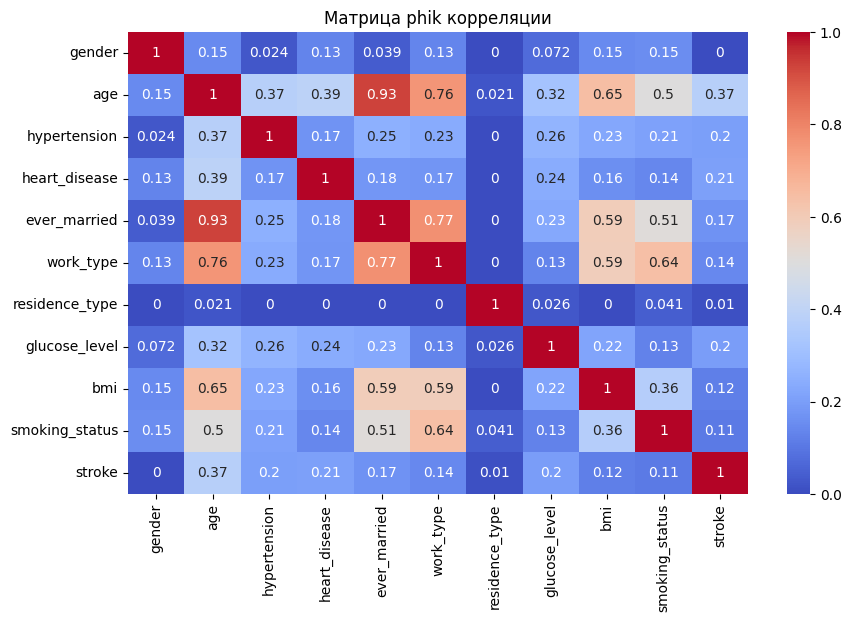

In [13]:
fig, axes = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(eda_data.phik_matrix(interval_cols=['age', 'bmi', 'glucose_level']), cmap='coolwarm', annot=True)
ax.set_title('–ú–∞—Ç—Ä–∏—Ü–∞ phik –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏')
plt.show()

In [14]:
corr_data = eda_data[['age', 'glucose_level', 'bmi', 'smoking_status']].copy()

In [15]:
data_binned, binning_dict = bin_data(corr_data, cols=['age', 'glucose_level', 'bmi'], retbins=True)

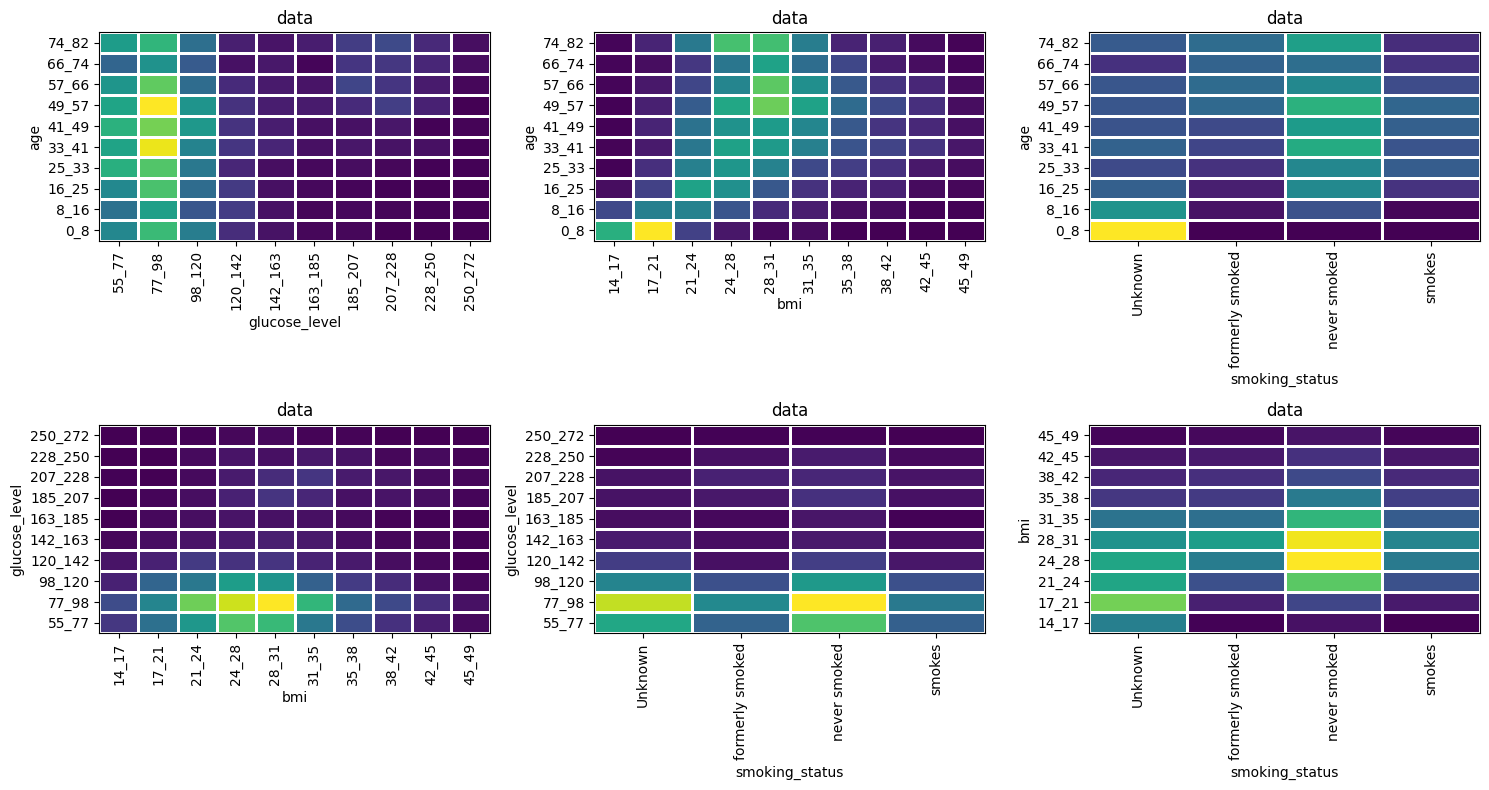

In [16]:
plt.rc('text', usetex=False)

n=0
for i in range(corr_data.shape[1]):
    n=n+i
    
ncols=3
nrows=int(np.ceil(n/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(15,4*nrows))
ndecimals = 0

for i, comb in enumerate(itertools.combinations(data_binned.columns.values, 2)):
    
    c = int(i%ncols)
    r = int((i-c)/ncols )

    # get data
    c0, c1 = comb
    datahist = data_binned.groupby([c0,c1], observed=False)[c0].count().to_frame().unstack().fillna(0)
    datahist.columns = datahist.columns.droplevel()
    
    # plot data
    img = axes[r][c].pcolormesh(datahist.values, edgecolor='w', linewidth=1)
    
    # axis ticks and tick labels
    if c0 in binning_dict.keys():
        ylabels = ['{1:.{0}f}_{2:.{0}f}'.format(ndecimals, binning_dict[c0][i][0], binning_dict[c0][i][1])
                   for i in range(len(binning_dict[c0]))]
    else:
        ylabels = datahist.index

    if c1 in binning_dict.keys():        
        xlabels = ['{1:.{0}f}_{2:.{0}f}'.format(ndecimals, binning_dict[c1][i][0], binning_dict[c1][i][1])
                    for i in range(len(binning_dict[c1]))]
    else:
        xlabels = datahist.columns
    
    # axis labels
    axes[r][c].set_yticks(np.arange(len(ylabels)) + 0.5)
    axes[r][c].set_xticks(np.arange(len(xlabels)) + 0.5)
    axes[r][c].set_xticklabels(xlabels, rotation='vertical')
    axes[r][c].set_yticklabels(ylabels, rotation='horizontal')    
    axes[r][c].set_xlabel(datahist.columns.name)
    axes[r][c].set_ylabel(datahist.index.name)    
    axes[r][c].set_title('data')
    
plt.tight_layout()

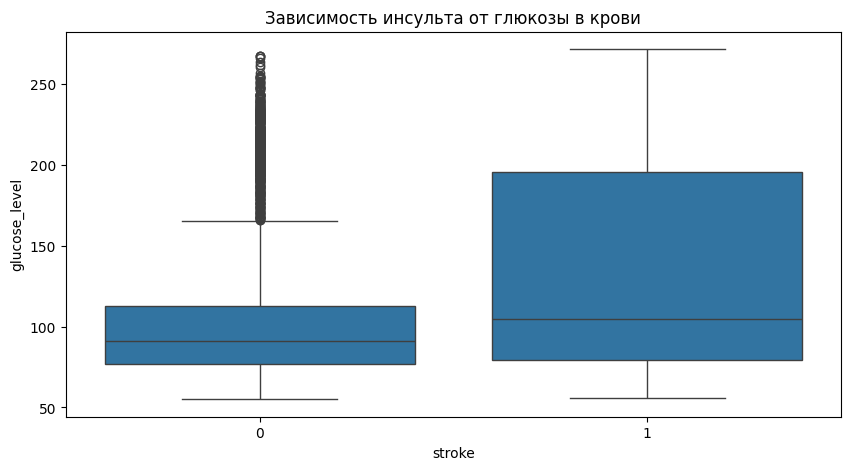

In [17]:
fig, axes = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(data=eda_data, x='stroke', y='glucose_level')
ax.set_title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∏–Ω—Å—É–ª—å—Ç–∞ –æ—Ç –≥–ª—é–∫–æ–∑—ã –≤ –∫—Ä–æ–≤–∏')
plt.show()

In [18]:
gstroke = eda_data.groupby(['gender', 'stroke']).agg(strokeCounter=('stroke', 'count')).reset_index()

gstroke

gender  stroke  strokeCounter
0  Female       0           2767
1  Female       1            140
2    Male       0           1966
3    Male       1            108

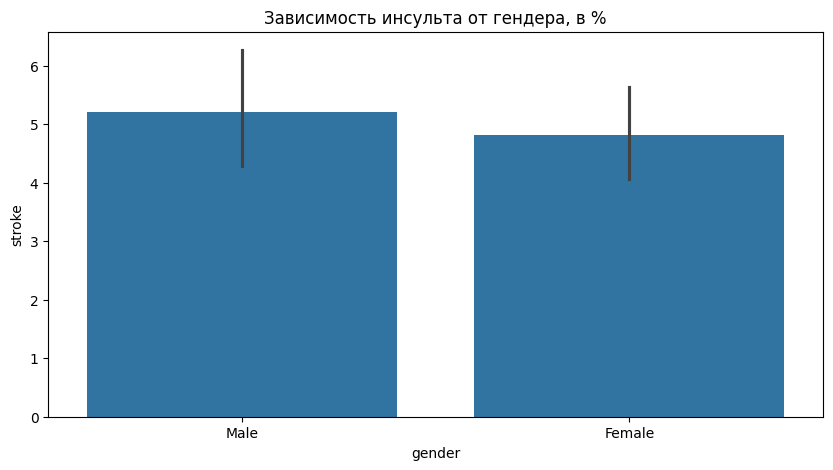

In [19]:
fig, axes = plt.subplots(figsize=(10, 5))
ax = sns.barplot(data=eda_data, x='gender', y='stroke', estimator=lambda x: sum(x) / len(x) * 100)
ax.set_title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∏–Ω—Å—É–ª—å—Ç–∞ –æ—Ç –≥–µ–Ω–¥–µ—Ä–∞, –≤ %')
plt.show()

In [20]:
eda_data['age_binned'] = pd.cut(eda_data['age'], bins=[0, 20, 35, 50, 100], labels=['–î–æ 18 –ª–µ—Ç', '–æ—Ç 20 –¥–æ 35 –ª–µ—Ç', '–æ—Ç 35 –¥–æ 50 –ª–µ—Ç', '–æ—Ç 50 –ª–µ—Ç'])

In [21]:
astroke = eda_data.groupby(['age_binned', 'stroke',], observed=True).agg(strokeCounter=('stroke', 'count')).reset_index()

astroke

age_binned  stroke  strokeCounter
0        –î–æ 18 –ª–µ—Ç       0            986
1        –î–æ 18 –ª–µ—Ç       1              2
2  –æ—Ç 20 –¥–æ 35 –ª–µ—Ç       0            852
3  –æ—Ç 20 –¥–æ 35 –ª–µ—Ç       1              1
4  –æ—Ç 35 –¥–æ 50 –ª–µ—Ç       0           1028
5  –æ—Ç 35 –¥–æ 50 –ª–µ—Ç       1             19
6        –æ—Ç 50 –ª–µ—Ç       0           1867
7        –æ—Ç 50 –ª–µ—Ç       1            226

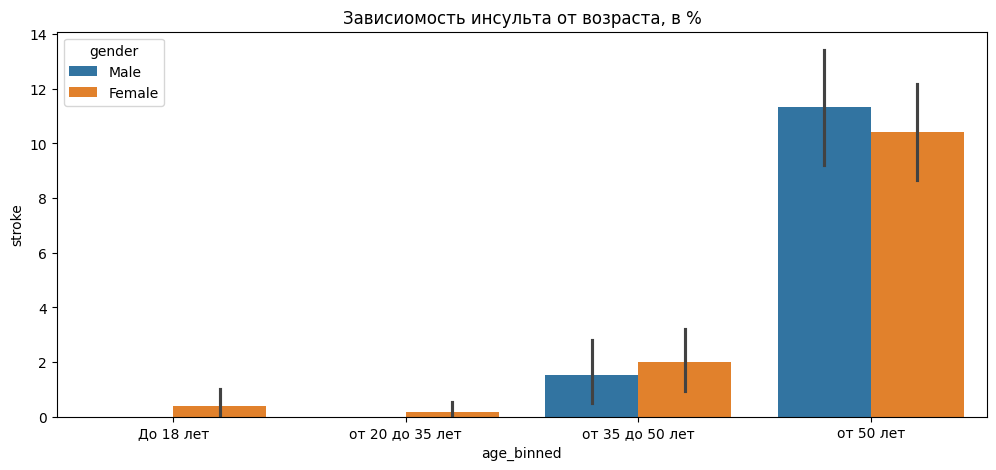

In [22]:
fig, axes = plt.subplots(figsize=(12, 5))
ax = sns.barplot(data=eda_data, x='age_binned', y='stroke', hue='gender', estimator=lambda x: sum(x) / len(x) * 100)
ax.set_title('–ó–∞–≤–∏—Å–∏–æ–º–æ—Å—Ç—å –∏–Ω—Å—É–ª—å—Ç–∞ –æ—Ç –≤–æ–∑—Ä–∞—Å—Ç–∞, –≤ %')
plt.show()

In [23]:
eda_data['bmi_binned'] = pd.cut(eda_data['bmi'], bins=[0, 20, 25, 30, 35, 50], labels=['–∏–º—Ç –¥–æ 20', '–∏–º—Ç –æ—Ç 20 –¥–æ 25', '–∏–º—Ç –æ—Ç 25 –¥–æ 30', '–∏–º—Ç –æ—Ç 30 –¥–æ 35', '–∏–º—Ç –æ—Ç 35 –¥–æ 50'])

In [24]:
wstroke = eda_data.groupby(['bmi_binned', 'stroke'], observed=True).agg(strokeCounter=('stroke', 'count')).reset_index()

wstroke

bmi_binned  stroke  strokeCounter
0        –∏–º—Ç –¥–æ 20       0            524
1        –∏–º—Ç –¥–æ 20       1              4
2  –∏–º—Ç –æ—Ç 20 –¥–æ 25       0           1030
3  –∏–º—Ç –æ—Ç 20 –¥–æ 25       1             35
4  –∏–º—Ç –æ—Ç 25 –¥–æ 30       0           1399
5  –∏–º—Ç –æ—Ç 25 –¥–æ 30       1            101
6  –∏–º—Ç –æ—Ç 30 –¥–æ 35       0           1004
7  –∏–º—Ç –æ—Ç 30 –¥–æ 35       1             67
8  –∏–º—Ç –æ—Ç 35 –¥–æ 50       0            776
9  –∏–º—Ç –æ—Ç 35 –¥–æ 50       1             41

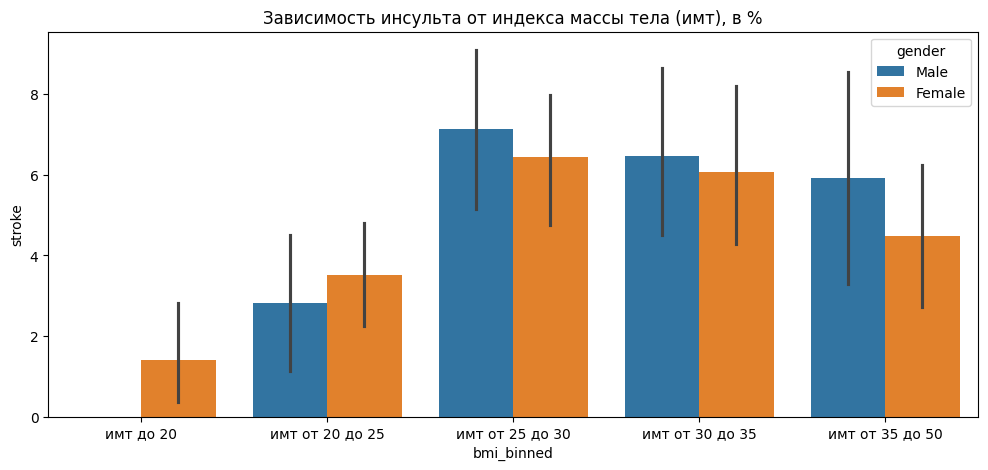

In [25]:
fig, axes = plt.subplots(figsize=(12, 5))
ax = sns.barplot(data=eda_data, x='bmi_binned', y='stroke', hue='gender', estimator= lambda x: sum(x) / len(x) * 100)
ax.set_title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∏–Ω—Å—É–ª—å—Ç–∞ –æ—Ç –∏–Ω–¥–µ–∫—Å–∞ –º–∞—Å—Å—ã —Ç–µ–ª–∞ (–∏–º—Ç), –≤ %')
plt.show()

In [26]:
sstroke = eda_data.groupby(['smoking_status', 'stroke'], observed=True).agg(strokeCounter=('stroke', 'count')).reset_index()

sstroke

smoking_status  stroke  strokeCounter
0          Unknown       0           1453
1          Unknown       1             47
2  formerly smoked       0            797
3  formerly smoked       1             70
4     never smoked       0           1749
5     never smoked       1             89
6           smokes       0            734
7           smokes       1             42

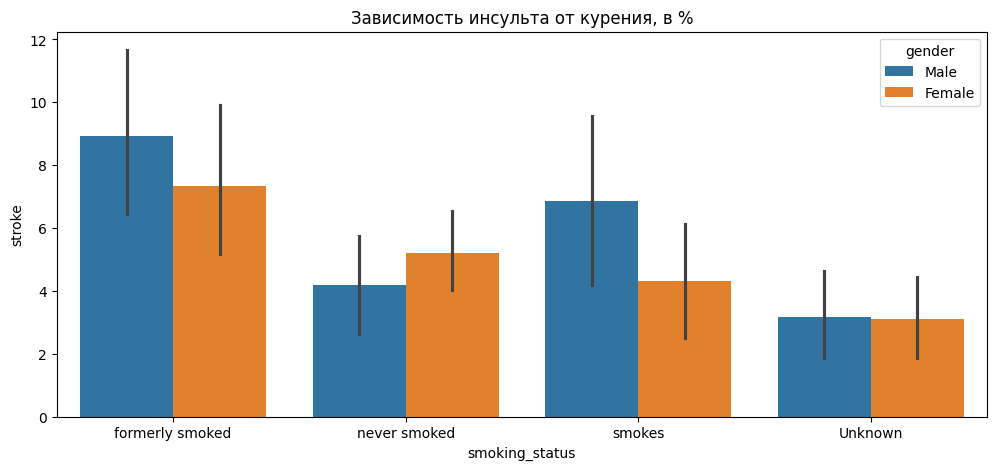

In [27]:
fig, axes = plt.subplots(figsize=(12, 5))
ax = sns.barplot(data=eda_data, x='smoking_status', y='stroke', hue='gender', estimator=lambda x: sum(x) / len(x) * 100)
ax.set_title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∏–Ω—Å—É–ª—å—Ç–∞ –æ—Ç –∫—É—Ä–µ–Ω–∏—è, –≤ %')
plt.show()

In [28]:
ahdstroke = eda_data.groupby(['age_binned', 'stroke', 'heart_disease'], observed=False).agg(strokeCounter=('stroke', 'count')).reset_index()

ahdstroke

age_binned  stroke  heart_disease  strokeCounter
0         –î–æ 18 –ª–µ—Ç       0              0            985
1         –î–æ 18 –ª–µ—Ç       0              1              1
2         –î–æ 18 –ª–µ—Ç       1              0              2
3         –î–æ 18 –ª–µ—Ç       1              1              0
4   –æ—Ç 20 –¥–æ 35 –ª–µ—Ç       0              0            850
5   –æ—Ç 20 –¥–æ 35 –ª–µ—Ç       0              1              2
6   –æ—Ç 20 –¥–æ 35 –ª–µ—Ç       1              0              1
7   –æ—Ç 20 –¥–æ 35 –ª–µ—Ç       1              1              0
8   –æ—Ç 35 –¥–æ 50 –ª–µ—Ç       0              0           1012
9   –æ—Ç 35 –¥–æ 50 –ª–µ—Ç       0              1             16
10  –æ—Ç 35 –¥–æ 50 –ª–µ—Ç       1              0             19
11  –æ—Ç 35 –¥–æ 50 –ª–µ—Ç       1              1              0
12        –æ—Ç 50 –ª–µ—Ç       0              0           1658
13        –æ—Ç 50 –ª–µ—Ç       0              1            209
14        –æ—Ç 50 –ª–µ—Ç       1              0            179
15        –æ—Ç 50 –ª–µ—Ç       1              1             47

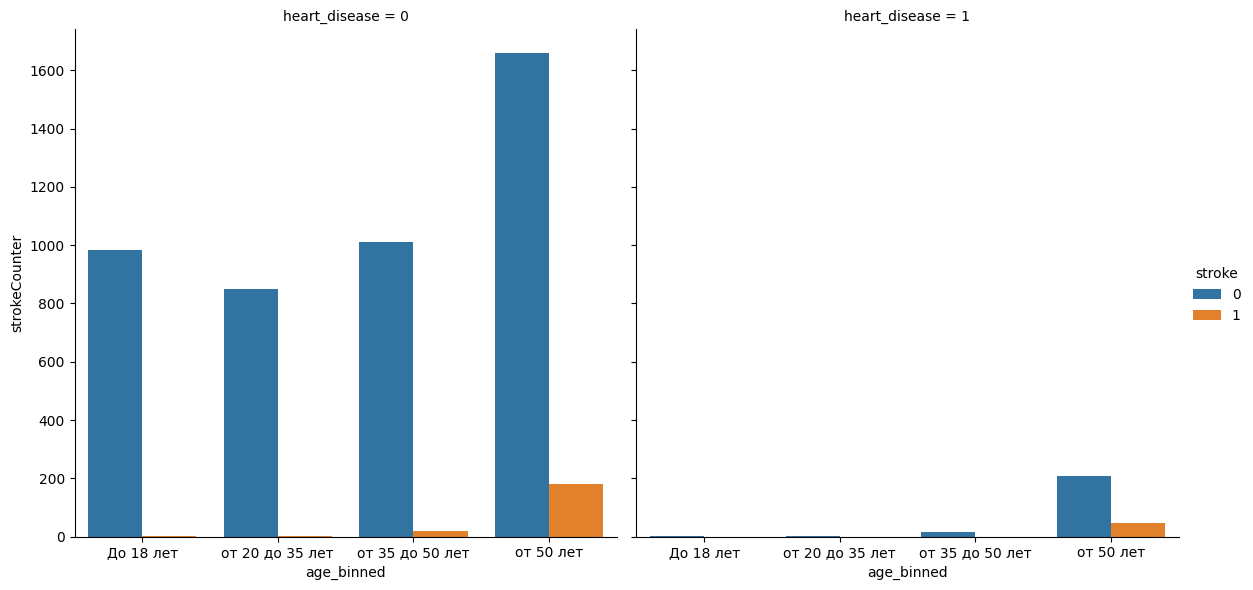

In [29]:
sns.catplot(x=ahdstroke.age_binned, y=ahdstroke.strokeCounter, hue=ahdstroke.stroke, col=ahdstroke.heart_disease, kind='bar', height=6)
plt.show()

In [30]:
ahtstroke = eda_data.groupby(['age_binned', 'stroke', 'hypertension'], observed=False).agg(strokeCounter=('stroke', 'count')).reset_index()

ahtstroke

age_binned  stroke  hypertension  strokeCounter
0         –î–æ 18 –ª–µ—Ç       0             0            985
1         –î–æ 18 –ª–µ—Ç       0             1              1
2         –î–æ 18 –ª–µ—Ç       1             0              2
3         –î–æ 18 –ª–µ—Ç       1             1              0
4   –æ—Ç 20 –¥–æ 35 –ª–µ—Ç       0             0            836
5   –æ—Ç 20 –¥–æ 35 –ª–µ—Ç       0             1             16
6   –æ—Ç 20 –¥–æ 35 –ª–µ—Ç       1             0              1
7   –æ—Ç 20 –¥–æ 35 –ª–µ—Ç       1             1              0
8   –æ—Ç 35 –¥–æ 50 –ª–µ—Ç       0             0            961
9   –æ—Ç 35 –¥–æ 50 –ª–µ—Ç       0             1             67
10  –æ—Ç 35 –¥–æ 50 –ª–µ—Ç       1             0             16
11  –æ—Ç 35 –¥–æ 50 –ª–µ—Ç       1             1              3
12        –æ—Ç 50 –ª–µ—Ç       0             0           1538
13        –æ—Ç 50 –ª–µ—Ç       0             1            329
14        –æ—Ç 50 –ª–µ—Ç       1             0            163
15        –æ—Ç 50 –ª–µ—Ç       1             1             63

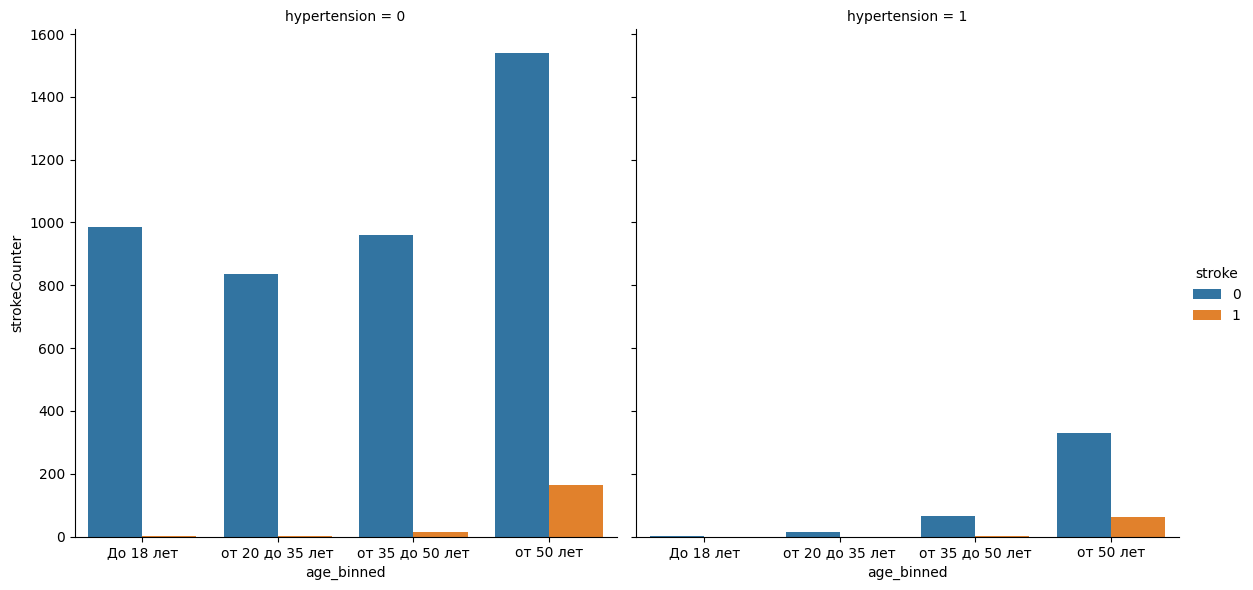

In [31]:
sns.catplot(x=ahtstroke.age_binned, y=ahtstroke.strokeCounter, hue=ahtstroke.stroke, col=ahtstroke.hypertension, kind='bar', height=6)
plt.show()

In [32]:
data['stroke'] = 1 - data['stroke']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('stroke', axis=1), data['stroke'], stratify=data['stroke'], test_size=0.2, random_state=42)

In [34]:
cat_cols = X_train.select_dtypes(include='object').columns.to_list()
num_cols = X_train.select_dtypes(exclude='object').columns.to_list()

In [35]:
cat_pipe = Pipeline([
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

In [36]:
num_pipe = Pipeline([
    ('pt', PowerTransformer(method='yeo-johnson'))
])

In [37]:
transformer = ColumnTransformer([
    ('num_pipe', num_pipe, num_cols),
    ('cat_pipe', cat_pipe, cat_cols),
])

In [38]:
xgboost_pipe = impipe([
    ('transformer', transformer),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier())
])

In [39]:
def objective_xgb(trial):
    params = {
                'model__eta': trial.suggest_float('model__eta', 0, 1),
                'model__max_depth': trial.suggest_int('model__max_depth', 6, 100),
                'model__max_leaves': trial.suggest_int('model__max_leaves', 0, 100000),
                'model__gamma': trial.suggest_float('model__gamma', 0, 1),
                'model__min_child_weight': trial.suggest_float('model__min_child_weight', 0, 10),
                'model__lambda': trial.suggest_float('model__lambda', 0, 5),
                'model__alpha': trial.suggest_float('model__alpha', 0, 5),
                'model__n_estimators': trial.suggest_categorical("model__n_estimators", [1000])
            }

    xgboost_pipe.set_params(**params)
    
    score = make_scorer(f1_score, pos_label=0)

    return cross_val_score(xgboost_pipe, X_train, y_train, cv=5, scoring=score).mean()
    

In [40]:
study = optuna.create_study(direction='maximize')

[I 2025-06-14 01:19:25,925] A new study created in memory with name: no-name-e6f1a07b-64cb-492e-b2cd-39c6aa3f7472


In [41]:
study.optimize(objective_xgb, n_trials=100)

[I 2025-06-14 01:19:32,697] Trial 0 finished with value: 0.11670890219991725 and parameters: {'model__eta': 0.011849422938349674, 'model__max_depth': 67, 'model__max_leaves': 29726, 'model__gamma': 0.758431403026968, 'model__min_child_weight': 9.7710516404943, 'model__lambda': 1.9823402551024278, 'model__alpha': 0.33573039648902236, 'model__n_estimators': 1000}. Best is trial 0 with value: 0.11670890219991725.
[I 2025-06-14 01:19:34,656] Trial 1 finished with value: 0.13466598770597374 and parameters: {'model__eta': 0.10937072754022104, 'model__max_depth': 75, 'model__max_leaves': 75957, 'model__gamma': 0.1366477424797986, 'model__min_child_weight': 6.06620091287126, 'model__lambda': 1.380210148664807, 'model__alpha': 2.26886924061011, 'model__n_estimators': 1000}. Best is trial 1 with value: 0.13466598770597374.
[I 2025-06-14 01:19:36,008] Trial 2 finished with value: 0.15603092406029986 and parameters: {'model__eta': 0.9305491952291477, 'model__max_depth': 99, 'model__max_leaves': 48

In [42]:
xgboost_best = xgboost_pipe.set_params(**study.best_params)

In [43]:
xgboost_best.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('pt',
                                                                   PowerTransformer())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'glucose_level', 'bmi']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'residence_type',
                                                   'smoking_status'])...
                               feature_weights=None, gamma=0.49631018668497096,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               lambda=2.881049098132826, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=14, max_leaves=12033,
                               min_child_weight=3.1163583645084816, missing=nan,
                               monotone_constraints=None, multi_strategy=None, ...))])

In [44]:
class FixDataType(BaseEstimator, TransformerMixin):
    def __init__(self, target_cols):
        self.target_cols = target_cols

    def fit(self, X, y=None):
        self.feature_names = X.columns
        return self
    
    def transform(self, X):
        for col in self.target_cols:
            X[col] = X[col].round().astype('int')

        return X
    
    def get_feature_names_out(self, input_features=None):
        return self.feature_names

In [45]:
cat_pipe2 = Pipeline([
    ('encoder', OrdinalEncoder())
])

In [46]:
transformer2 = ColumnTransformer([
    ('num_pipe', num_pipe, num_cols),
    ("cat_pipe", cat_pipe2, cat_cols)
],)

In [47]:
catboost_pipe = impipe([
    ("transformer", transformer2),
    ("smote", SMOTE(random_state=42)),
    ("fixer", FixDataType(['cat_pipe__' + x for x in cat_cols])),
    ("model", CatBoostClassifier(cat_features=["cat_pipe__" + x for x in cat_cols]))
])

In [48]:
catboost_pipe.fit(X_train, y_train)

Learning rate set to 0.024454
0:	learn: 0.6783387	total: 174ms	remaining: 2m 53s
1:	learn: 0.6655161	total: 198ms	remaining: 1m 38s
2:	learn: 0.6543690	total: 226ms	remaining: 1m 15s
3:	learn: 0.6430333	total: 246ms	remaining: 1m 1s
4:	learn: 0.6318717	total: 269ms	remaining: 53.5s
5:	learn: 0.6205350	total: 292ms	remaining: 48.3s
6:	learn: 0.6065457	total: 312ms	remaining: 44.2s
7:	learn: 0.5957091	total: 347ms	remaining: 43s
8:	learn: 0.5868457	total: 379ms	remaining: 41.7s
9:	learn: 0.5780064	total: 402ms	remaining: 39.8s
10:	learn: 0.5695903	total: 425ms	remaining: 38.2s
11:	learn: 0.5627278	total: 461ms	remaining: 38s
12:	learn: 0.5562310	total: 483ms	remaining: 36.6s
13:	learn: 0.5479579	total: 504ms	remaining: 35.5s
14:	learn: 0.5414892	total: 526ms	remaining: 34.5s
15:	learn: 0.5355951	total: 549ms	remaining: 33.7s
16:	learn: 0.5297473	total: 571ms	remaining: 33s
17:	learn: 0.5237573	total: 593ms	remaining: 32.4s
18:	learn: 0.5184409	total: 617ms	remaining: 31.8s
19:	learn: 0.5

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('pt',
                                                                   PowerTransformer())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'glucose_level', 'bmi']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'residence_type',
                                                   'smoking_status'])])),
                ('smote', SMOTE(random_state=42)),
                ('fixer',
                 FixDataType(target_cols=['cat_pipe__gender',
                                          'cat_pipe__ever_married',
                                          'cat_pipe__work_type',
                                          'cat_pipe__residence_type',
                                          'cat_pipe__smoking_status'])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x0000024C8746C590>)])

In [49]:
def report_metrics(mlflow, y_test, y_pred, y_proba, sufix):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=0)
    recall = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    
    print(f"Accuracy_{sufix}: {accuracy}")
    print(f"Precision_{sufix}: {precision}")
    print(f"Recall_{sufix}: {recall}")
    print(f"F1 Score_{sufix}: {f1}")
    print(f"ROC AUC_{sufix}: {roc_auc}")
    print(f"Confusion Matrix_{sufix}:\n", cm)
    print(f"Balanced Accuracy_{sufix}: {balanced_accuracy}")

    mlflow.log_metric(f"accuracy_{sufix}", accuracy)
    mlflow.log_metric(f"precision_{sufix}", precision)
    mlflow.log_metric(f"recall_{sufix}", recall)
    mlflow.log_metric(f"f1_score_{sufix}", f1)
    mlflow.log_metric(f"roc_auc_{sufix}", roc_auc)
    mlflow.log_metric(f"balanced_accuracy_{sufix}", balanced_accuracy)
    mlflow.log_text(f"Confusion Matrix:\n{cm}", f"confusion_matrix_{sufix}.txt")

    fpr, tpr, threshold = roc_curve(y_test, y_proba)
    plt.figure(figsize=(30, 20))
    plt.plot(fpr, tpr, label=f"roc_curve_{sufix} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    mlflow.log_figure(plt.gcf(), f"roc_curve_{sufix}.png")
    plt.close()

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    mlflow.log_figure(plt.gcf(), f"confusion_matrix_{sufix}.png")
    plt.close()


In [50]:
def mlflow_run(best_pipeline, best_params, X_test, y_test):
    mlflow.log_params(best_params)

    y_pred = best_pipeline.predict(X_test)
    y_proba = best_pipeline.predict_proba(X_test)[:, 1]

    report_metrics(mlflow, y_test, y_pred, y_proba, 'ml')

    mlflow.sklearn.log_model(best_pipeline, "model_pipeline")


    try:
        importances = best_pipeline.feature_importances_
        feature_names = X_test.columns.to_list()
    except:
        importances = best_pipeline.named_steps['model'].feature_importances_
        feature_names = best_pipeline.named_steps['transformer'].get_feature_names_out()


    feat_imp_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values(by='importance', ascending=False)

    feat_imp_df = feat_imp_df[feat_imp_df['importance'] > 0].head(40)
    total_importance = feat_imp_df['importance'].sum()
    feat_imp_df['importance_fraction'] = feat_imp_df['importance'] / total_importance
    
    fig, ax = plt.subplots(figsize=(25, 25))
    bars = ax.barh(feat_imp_df['feature'], feat_imp_df['importance_fraction'], color='skyblue')
    ax.invert_yaxis()
    
    ax.set_title("Feature Importances from XGBoost")
    ax.set_xlabel("Importance (%)")
    ax.set_ylabel("Features")
    ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
    
    for bar in bars:
        width = bar.get_width()
        label_text = f"{width:.1%}"
        ax.text(
            width + 0.01,
            bar.get_y() + bar.get_height() / 2,
            label_text,
            va='center'
        )
    
    mlflow.log_figure(plt.gcf(), "feature_importances.png")

    feat_imp_df.to_csv("feature_importances.csv", index=False)
    mlflow.log_artifact("feature_importances.csv")
    
    plt.close()
    

    print("\nRun finished. All results have been logged to MLflow.")

In [51]:
mlflow.set_experiment("BrainStroke")

2025/06/14 01:22:31 INFO mlflow.tracking.fluent: Experiment with name 'BrainStroke' does not exist. Creating a new experiment.


<Experiment: artifact_location='s3://mlflow-buck/artifacts/3', creation_time=1749853351619, experiment_id='3', last_update_time=1749853351619, lifecycle_stage='active', name='BrainStroke', tags={}>

In [52]:
name = 'catboost'

with mlflow.start_run(run_name=f"{name}_experiment"):
    mlflow_run(catboost_pipe, {}, X_test, y_test)

Accuracy_ml: 0.9147442326980942
Precision_ml: 0.21311475409836064
Recall_ml: 0.26
F1 Score_ml: 0.9187195964703208
ROC AUC_ml: 0.7926504751847941
Confusion Matrix_ml:
 [[ 13  37]
 [ 48 899]]
Balanced Accuracy_ml: 0.6046568109820486


2025/06/14 01:22:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/14 01:22:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Run finished. All results have been logged to MLflow.
üèÉ View run catboost_experiment at: http://84.201.180.128:8000/#/experiments/3/runs/ba4da6a72ba84027b7fec5f221f54806
üß™ View experiment at: http://84.201.180.128:8000/#/experiments/3


In [53]:
name = 'xgboost'

with mlflow.start_run(run_name=f"{name}_experiment"):
    mlflow_run(xgboost_best, xgboost_best.get_params(), X_test, y_test)

Accuracy_ml: 0.9017051153460381
Precision_ml: 0.125
Recall_ml: 0.16
F1 Score_ml: 0.9073747745663268
ROC AUC_ml: 0.812481520591341
Confusion Matrix_ml:
 [[  8  42]
 [ 56 891]]
Balanced Accuracy_ml: 0.5504329461457234


2025/06/14 01:22:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/14 01:22:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Run finished. All results have been logged to MLflow.
üèÉ View run xgboost_experiment at: http://84.201.180.128:8000/#/experiments/3/runs/a2ade67a76614ee3b72911480add9eca
üß™ View experiment at: http://84.201.180.128:8000/#/experiments/3
